In [4]:
import numpy as np
import pandas as pd
import psycopg2 as pg
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
conn = pg.connect(dbname ="postgres", host="db.dssg.io", user = "kyang", password = "postgresis19")

In [6]:
script = "select * from IEFP.interviews;"
results_df = pd.read_sql(script, con=conn)

In [9]:
type(results_df)

pandas.core.frame.DataFrame

In [10]:
results_df.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,apresentacao_resultado,dresultado_apresentacao
0,200701,37,RESULTADO APRESENTAÃÃES,1060922,22,RECUSA DE ENTIDADE EMPREGADORA - DESAJUSTAMENT...
1,200701,37,RESULTADO APRESENTAÃÃES,1062047,10,ADMITIDO / COLOCADO
2,200701,37,RESULTADO APRESENTAÃÃES,1062047,29,RECUSA ENTIDADE EMPREGADORA- OUTROSMOTIVOS
3,200701,37,RESULTADO APRESENTAÃÃES,1080395,10,ADMITIDO / COLOCADO
4,200701,37,RESULTADO APRESENTAÃÃES,1133828,21,RECUSA DE ENTIDADE EMPREGADORA - POSTO JÃ PRE...


In [46]:
dir(results_df) #can also hit tab after results_df.

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',


In [11]:
results_df.shape

(127702, 6)

In [12]:
results_df[['anomes','ute_id']][0:5] # first 5 rows of the two specified columns

,anomes,ute_id
0,200701,1060922
1,200701,1062047
2,200701,1062047
3,200701,1080395
4,200701,1133828


In [13]:
interviews = results_df.drop(['ctipo_movimento'], axis =1)

In [23]:
interviews.describe(include=None)

,anomes,ute_id,apresentacao_resultado
count,127702.000000,1.277020e+05,127702.000000
mean,201135.435475,3.182680e+06,27.460705
std,301.959642,1.450536e+06,13.035716
min,200701.000000,8.180000e+02,10.000000
25%,200904.000000,1.658714e+06,22.000000
50%,201103.000000,3.311796e+06,23.000000
75%,201407.000000,4.279788e+06,24.000000
max,201704.000000,6.546249e+06,99.000000


In [24]:
interviews['dresultado_apresentacao'].value_counts().head()

RECUSA DA ENTIDADE EMPREGADORA - NÃO MARCAÃÃO DA ENTREVISTA DA E.E. APÃS 1Âº CONTACTO    33489
RECUSA DE ENTIDADE EMPREGADORA - DESAJUSTAMENTO PROFISSIONAL                                 29496
RECUSA DE ENTIDADE EMPREGADORA - POSTO JÃ PREENCHIDO                                        22349
NÃO RESPOSTA APÃS INSISTÃNCIA                                                             11586
ADMITIDO / COLOCADO                                                                           7738
Name: dresultado_apresentacao, dtype: int64

In [25]:
# interviews['dresultado_apresentacao'].value_counts().plot(kind='bar')

In [26]:
# interviews[interviews['anomes'] == 200801]

In [27]:
interviews['year']= interviews['anomes'].apply(lambda x: int(str(x)[:4]))
interviews['month']= interviews['anomes'].apply(lambda x: int(str(x)[4:6]))

In [28]:
interviews.dtypes

anomes                      int64
dtipo_movimento            object
ute_id                      int64
apresentacao_resultado      int64
dresultado_apresentacao    object
year                        int64
month                       int64
dtype: object

In [29]:
interviews.year.value_counts()

2010    17427
2009    15063
2007    14987
2008    12924
2015    12319
2011    12015
2016    11145
2012    10279
2014     9793
2013     7948
2017     3802
Name: year, dtype: int64

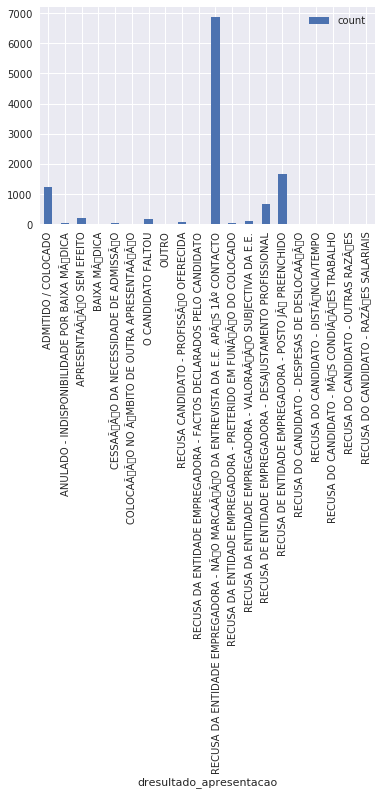

In [30]:
interviews[interviews['year']==2016].groupby(['dresultado_apresentacao']).ute_id.agg(['count']).plot(kind='bar')

In [59]:
# interviews.groupby(['year','dresultado_apresentacao']).ute_id.agg(['count']).unstack('year')
interviews.groupby(['dresultado_apresentacao']).ute_id.agg(['count'])

,count
dresultado_apresentacao,
ADMITIDO / COLOCADO,7738
ANULADO - INDISPONIBILIDADE POR BAIXA MÃDICA,141
APRESENTAÃÃO SEM EFEITO,7090
BAIXA MÃDICA,25
CESSAÃÃO DA NECESSIDADE DE ADMISSÃO,840
COLOCAÃÃO NO ÃMBITO DE OUTRA APRESENTAÃÃO,38
NÃO RESPOSTA APÃS INSISTÃNCIA,11586
O CANDIDATO FALTOU,2459
OUTRO,557


In [35]:
#plt.hist(interviews['year'])

In [50]:
placements = interviews[interviews['dresultado_apresentacao'] == 'ADMITIDO / COLOCADO']

(array([ 14987.,  12924.,  15063.,  17427.,  12015.,  10279.,   7948.,
          9793.,  12319.,  14947.]),
 array([ 2007.,  2008.,  2009.,  2010.,  2011.,  2012.,  2013.,  2014.,
         2015.,  2016.,  2017.]),
 <a list of 10 Patch objects>)

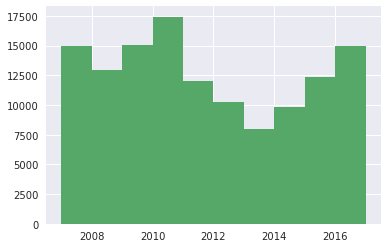

In [55]:
plt.hist(placements['year'])
plt.hist(interviews['year'])